# Exploratory Data Analysis and Outlier Removal Notebook

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from tqdm import tqdm 
from pathlib import Path
import matplotlib.pyplot  as plt
import matplotlib.gridspec as gridspec
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
import librosa
import librosa.display


In [8]:
# Reading data csv
main_data = pd.read_csv("data\raw\main_data.csv") 
main_data

,cough_path,disease,patient_ID,cough_gender,cough_duration,age,gender
0,S:\annotated_new\S1 Giuliano\0212Night1Part\Ex...,asthma,S1 Giuliano,f,0.070340,26.0,f
1,S:\annotated_new\S1 Giuliano\0212Night1Part\Ex...,asthma,S1 Giuliano,f,0.060952,26.0,f
2,S:\annotated_new\S1 Giuliano\0212Night1Part\Ex...,asthma,S1 Giuliano,f,0.058639,26.0,f
3,S:\annotated_new\S1 Giuliano\0213Night1Part\Ex...,asthma,S1 Giuliano,f,0.080907,26.0,f
4,S:\annotated_new\S1 Giuliano\0213Night1Part\Ex...,asthma,S1 Giuliano,f,0.076190,26.0,f
...,...,...,...,...,...,...,...
30853,C:\Users\Admin\Desktop\DATASETS\Healthy Coughs...,healthy,47,m,0.500000,27.0,m
30854,C:\Users\Admin\Desktop\DATASETS\Healthy Coughs...,healthy,47,m,0.500000,27.0,m
30855,C:\Users\Admin\Desktop\DATASETS\Healthy Coughs...,healthy,47,m,0.500000,27.0,m
30856,C:\Users\Admin\Desktop\DATASETS\Healthy Coughs...,healthy,47,m,0.500000,27.0,m


# Visualizations

### Visualization by Disease Type

In [15]:
# Defining random cough paths for visualization
asthma_cough = main_data["cough_path"][main_data["disease"] == "asthma"][3]
covid_cough = main_data["cough_path"][main_data["disease"] == "covid-19"][21750]
copd_cough = main_data["cough_path"][main_data["disease"] == "copd"][27586]
healthy_cough = main_data["cough_path"][main_data["disease"] == "healthy"][30856]

print(asthma_cough)
print(copd_cough)
print(covid_cough)
print(healthy_cough)

S:\annotated_new\S1 Giuliano\0213Night1Part\Export\cough1-f.wav
C:\Users\Admin\Desktop\DATASETS\Codex\LabeledData\CODEX07\cough_day-1\170621-161638-1206-Codex07\cough1-m.wav
C:\Users\Admin\Desktop\DATASETS\Covid\COCO001_cough_day-0_24h\170420-114227-498-COCO001_1587116552901_170420-114227-498-COCO001_1587116554221\cough1-m.wav
C:\Users\Admin\Desktop\DATASETS\Healthy Coughs\Data\Samsung\close\47\cough_p47_s6-68.wav


C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1784
  warnings.warn(


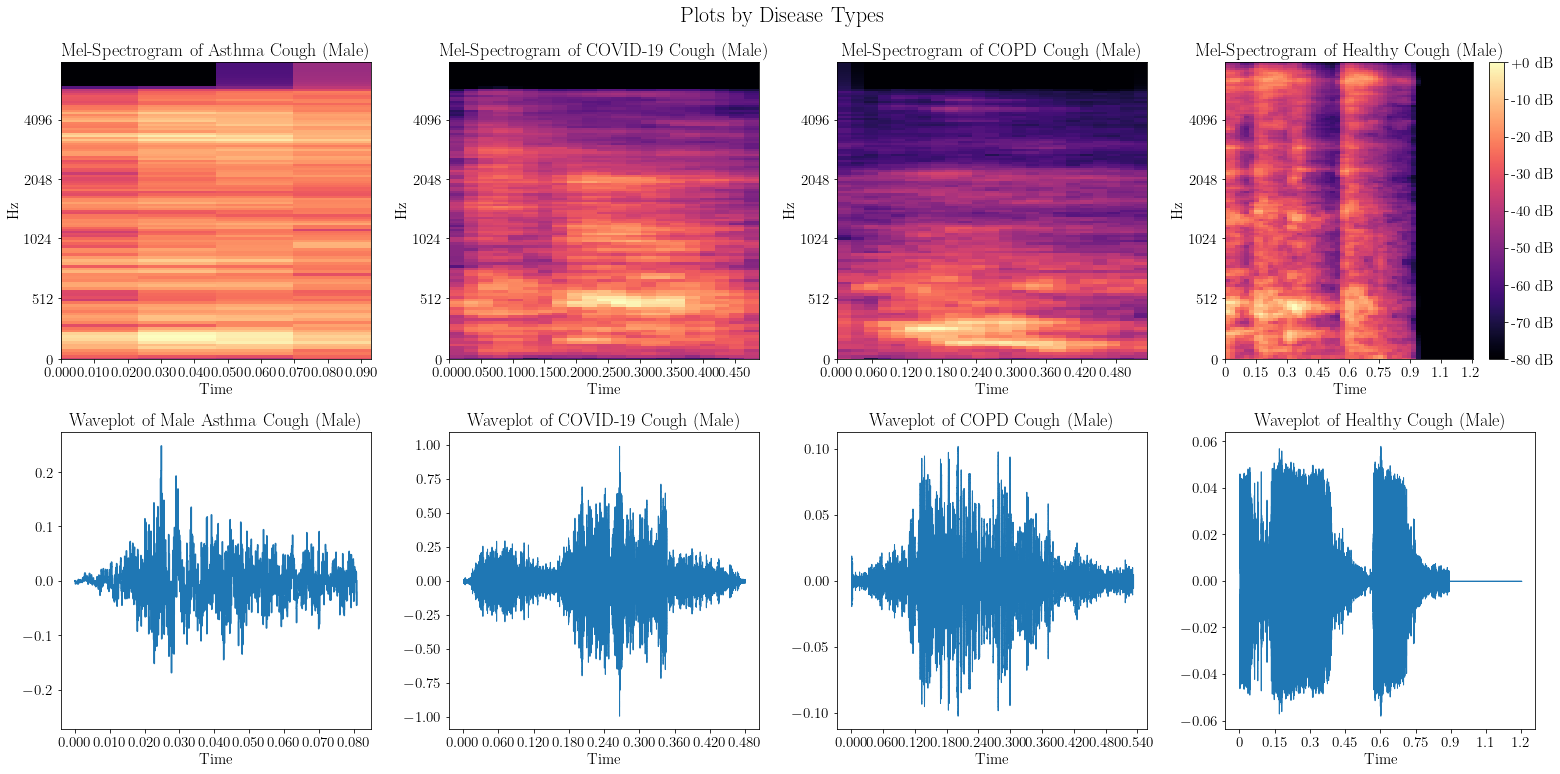

In [16]:
cough_vis = [asthma_cough, covid_cough, copd_cough, healthy_cough]

i = 0
fig, axs = plt.subplots(2, 4, figsize=(22,11))
fig.suptitle('Plots by Disease Types', fontsize=22)

for i, cough in enumerate(cough_vis): 

    y, sr = librosa.load(cough)
    D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=D, sr=sr) 

    S_dB = librosa.power_to_db(S, ref=np.max)
    if i == 0:
        # Mel-Spectrogram
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,0])
        axs[0,0].set(title='Mel-Spectrogram of Asthma Cough (Male)')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,0])
        axs[1,0].set(title='Waveplot of Male Asthma Cough (Male)')
    if i ==1:
        # Mel-Spectrogram        
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,1])
        axs[0,1].set(title='Mel-Spectrogram of COVID-19 Cough (Male)')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,1])
        axs[1,1].set(title='Waveplot of COVID-19 Cough (Male)')        
    if i ==2:
        # Mel-Spectrogram
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,2])
        axs[0,2].set(title='Mel-Spectrogram of COPD Cough (Male)')    
        
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,2])
        axs[1,2].set(title='Waveplot of COPD Cough (Male)')
    if i ==3:
        # Mel-Spectrogram
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,3])
        axs[0,3].set(title='Mel-Spectrogram of Healthy Cough (Male)')    
        fig.colorbar(img, ax=axs[0,3], format='%+2.0f dB')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,3])
        axs[1,3].set(title='Waveplot of Healthy Cough (Male)')

# fig.subplots_adjust(top=0.92)
fig.tight_layout()
# plt.savefig("plots\\plots_disease_types.pdf", dpi=200) 
# plt.savefig("plots\\plots_disease_types.png", dpi=200)
plt.show()


### Visualization by particular patient 

In [17]:
# Defining random cough paths for visualization
asthma_cough1 = main_data["cough_path"][main_data["disease"] == "asthma"][123]
asthma_cough2 = main_data["cough_path"][main_data["disease"] == "asthma"][125]
asthma_cough3 = main_data["cough_path"][main_data["disease"] == "asthma"][126]
print(asthma_cough1)
print(asthma_cough2)
print(asthma_cough3)

S:\annotated_new\S10 Giuliano\0523Night2Part\Export\cough19-f.wav
S:\annotated_new\S10 Giuliano\0523Night2Part\Export\cough20-f.wav
S:\annotated_new\S10 Giuliano\0523Night2Part\Export\cough21-f.wav


C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1132
  warnings.warn(


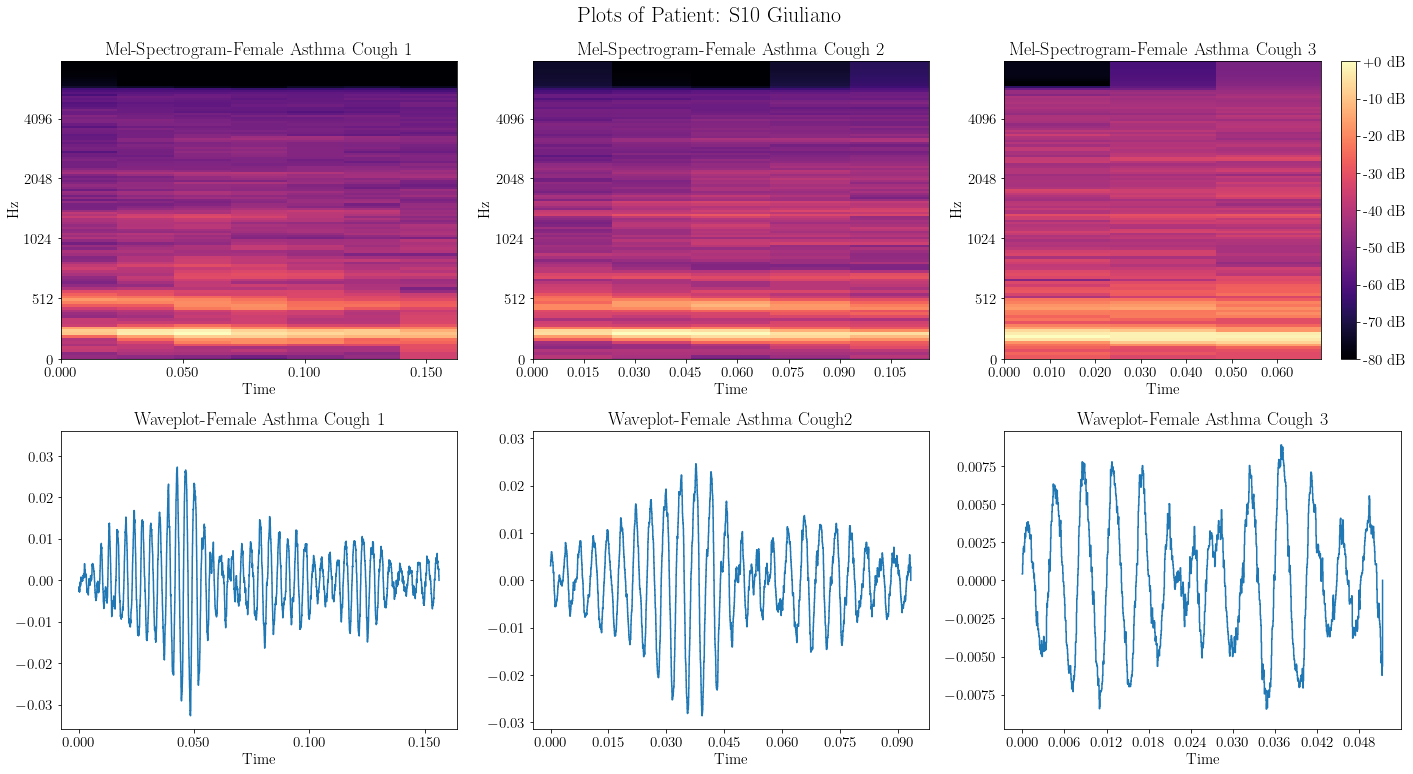

In [18]:

cough_vis = [asthma_cough1, asthma_cough2, asthma_cough3]

i = 0
fig, axs = plt.subplots(2, 3, figsize=(20,11))
fig.suptitle('Plots of Patient: S10 Giuliano', fontsize=22)
for i, cough in enumerate(cough_vis): 

    y, sr = librosa.load(cough)
    D = np.abs(librosa.stft(y))**2 # returns STFT Coefficients in matrix form
    S = librosa.feature.melspectrogram(S=D, sr=sr) 

    S_dB = librosa.power_to_db(S, ref=np.max)
    if i == 0:
        # Mel-Spectrogram
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,0])
        axs[0,0].set(title='Mel-Spectrogram-Female Asthma Cough 1')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,0])
        axs[1,0].set(title='Waveplot-Female Asthma Cough 1')
    if i ==1:
        # Mel-Spectrogram        
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,1])
        axs[0,1].set(title='Mel-Spectrogram-Female Asthma Cough 2')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,1])
        axs[1,1].set(title='Waveplot-Female Asthma Cough2')        
    if i ==2:
        # Mel-Spectrogram
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axs[0,2])
        axs[0,2].set(title='Mel-Spectrogram-Female Asthma Cough 3')    
        fig.colorbar(img, ax=axs[0,2], format='%+2.0f dB')
        # Waveplot
        img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=axs[1,2])
        axs[1,2].set(title='Waveplot-Female Asthma Cough 3')                

# fig.subplots_adjust(top=0.92)
fig.tight_layout()
# plt.savefig("plots\\plots_asthma_coughs.pdf", dpi=200)
# plt.savefig("plots\\plots_asthma_coughs.png", dpi=200)
plt.show()

# Exploratory Data Analysis

Total patients: 135
Total coughs: 30858


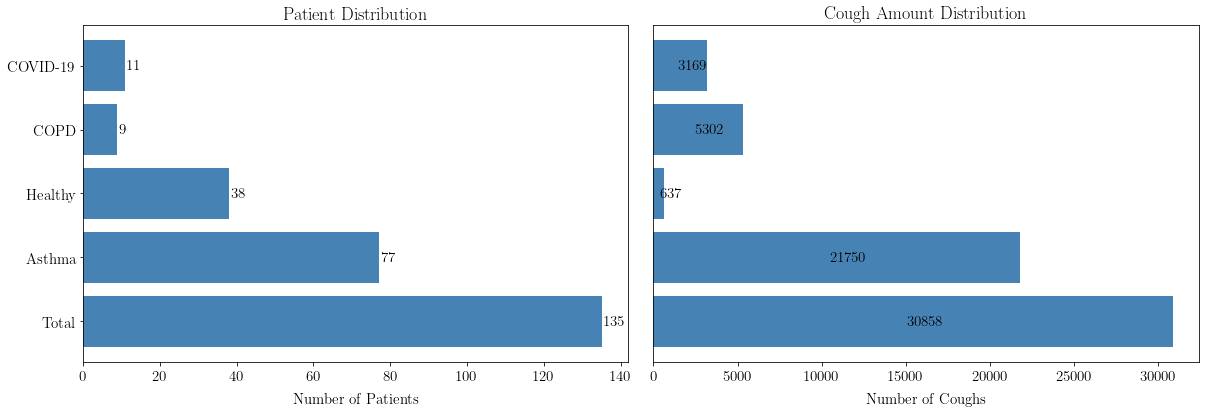

In [9]:
total_cough = main_data["cough_path"].nunique()
total_patient = main_data["patient_ID"].nunique()

print("Total patients: %i" % total_patient)
print("Total coughs: %i" % total_cough)


fig, axs = plt.subplots(1, 2, figsize=(17,6))

patients_by_disease = main_data.groupby(["patient_ID"])["disease"].value_counts().rename_axis(['patient_ID','disease']).reset_index(name='counts')

asthma_pat = len(patients_by_disease[patients_by_disease["disease"]=="asthma"])
copd_pat = len(patients_by_disease[patients_by_disease["disease"]=="copd"])
covid_pat = len(patients_by_disease[patients_by_disease["disease"]=="covid-19"])
healthy_pat = len(patients_by_disease[patients_by_disease["disease"]=="healthy"])

patient_distribution = [asthma_pat, copd_pat, covid_pat, healthy_pat]
total = np.sum(patient_distribution)
labels = ["Total", "Asthma","Healthy", "COPD","COVID-19"]
patient_distribution = [total, asthma_pat, healthy_pat, copd_pat, covid_pat]
axs[0].barh(labels, patient_distribution, color=["steelblue"])
axs[0].set(title="Patient Distribution")
axs[0].bar_label(axs[0].containers[0], label_type='edge', padding=2)
axs[0].set_xlabel("Number of Patients", labelpad=10.0)

bar_data = main_data["disease"].value_counts().rename_axis('disease').reset_index(name='counts')

row = pd.Series({"disease":"Total", "counts":total_cough})
bar_data = bar_data.append(row, ignore_index=True)

bar_data_all = [bar_data["counts"][4], bar_data["counts"][0], bar_data["counts"][3], bar_data["counts"][1], bar_data["counts"][2]]

labels2 = ["Total", "Asthma","Healthy", "COPD","COVID-19"]
axs[1].barh(labels2, bar_data_all, color=["steelblue"])
axs[1].set(title="Cough Amount Distribution")
axs[1].bar_label(axs[1].containers[0], label_type='center', padding=12)
axs[1].set(yticks=[])
axs[1].set_xlabel("Number of Coughs", labelpad=10.0)


fig.tight_layout()
# plt.savefig("plots\\eda1.pdf", dpi=200)
# plt.savefig("plots\\eda1.png", dpi=200)

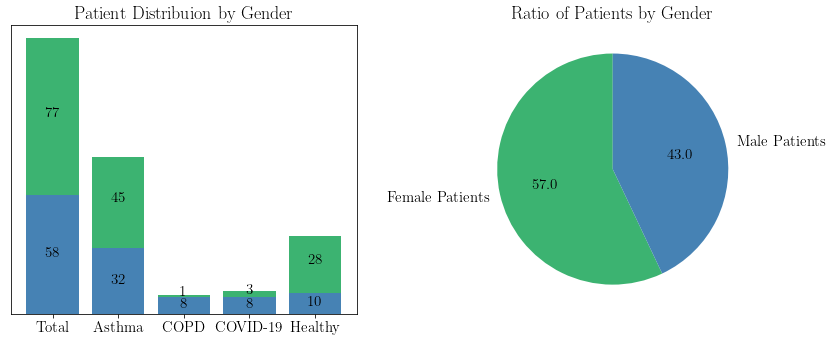

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 Data
patients_by_disease = main_data.groupby(["patient_ID", "gender"])["disease"].value_counts().rename_axis(['patient_ID',"gender", 'disease']).reset_index(name='counts')
asthma_pat = patients_by_disease[patients_by_disease["disease"]=="asthma"]
copd_pat = patients_by_disease[patients_by_disease["disease"]=="copd"]
covid_pat = patients_by_disease[patients_by_disease["disease"]=="covid-19"]
healthy_pat = patients_by_disease[patients_by_disease["disease"]=="healthy"]

asthma_pat_female = len(asthma_pat[asthma_pat["gender"]=="f"])
asthma_pat_male = len(asthma_pat[asthma_pat["gender"]=="m"])

copd_pat_female =  len(copd_pat[copd_pat["gender"]=="f"])
copd_pat_male = len(copd_pat[copd_pat["gender"]=="m"])

covid_pat_female =  len(covid_pat[covid_pat["gender"]=="f"])
covid_pat_male = len(covid_pat[covid_pat["gender"]=="m"])

healthy_pat_female =  len(healthy_pat[healthy_pat["gender"]=="f"])
healthy_pat_male = len(healthy_pat[healthy_pat["gender"]=="m"])

total_female = np.sum([asthma_pat_female, copd_pat_female, covid_pat_female, healthy_pat_female])
total_male = np.sum([asthma_pat_male, copd_pat_male, covid_pat_male, healthy_pat_male])

patient_distribution_female = [total_female, asthma_pat_female, copd_pat_female, covid_pat_female, healthy_pat_female]
patient_distribution_male = [total_male, asthma_pat_male, copd_pat_male, covid_pat_male, healthy_pat_male]

# Plot 2 and 3 Data
bar_data = main_data["disease"].value_counts().rename_axis('disease').reset_index(name='counts')

bar_data2 = main_data.groupby("disease")["cough_gender"].value_counts().rename_axis(['disease','gender']).reset_index(name='counts')
bar_data21_f = bar_data2[bar_data2["gender"]=="f"]
bar_data21_m = bar_data2[bar_data2["gender"]=="m"]

total_male = np.sum(bar_data21_m["counts"])
total_female = np.sum(bar_data21_f["counts"])

row_male_total = pd.DataFrame({"disease":"Total", "gender":"m", "counts":total_male}, index=[0])
row_female_total = pd.DataFrame({"disease":"Total", "gender":"f", "counts":total_female}, index=[0])

bar_data21_m = pd.concat([row_male_total, bar_data21_m])
bar_data21_f = pd.concat([row_female_total, bar_data21_f])


labels = ["Total", "Asthma","COPD", "COVID-19", "Healthy"]

# Plot 1 
axs[0].bar(labels, patient_distribution_male, color=["steelblue"])
t = 0
for m in axs[0].containers:
    data_label = [v if v > t else "" for v in m.datavalues]    
axs[0].bar_label(m, labels=data_label,label_type='center', padding=2)
axs[0].bar(labels, patient_distribution_female, bottom=patient_distribution_male, color=["mediumseagreen"])
t = 0
for m in axs[0].containers:
    data_labelf = [v if v > t else "" for v in m.datavalues]  
axs[0].bar_label(m, labels=data_labelf, label_type='center', padding=5)
axs[0].set(yticks=[])
axs[0].set(title="Patient Distribuion by Gender")

# Plot 2 New
patient_distribution_male[0]
patient_distribution_female[0]
data= np.array([patient_distribution_female[0], patient_distribution_male[0]])
gender_patients = pd.Series(data, index =["Female Patients", "Male Patients"])

axs[1].pie(gender_patients, labels = gender_patients.index, autopct=lambda p :'{:.1f}%  ({:,.0f})'.format(p,p * sum(data)/100), startangle = 90, colors=["mediumseagreen", "steelblue"])
axs[1].set(title='Ratio of Patients by Gender')

fig.tight_layout()
plt.show()
# plt.savefig("plots\\eda2a.pdf", dpi=200)
# plt.savefig("plots\\eda2a.png", dpi=200)



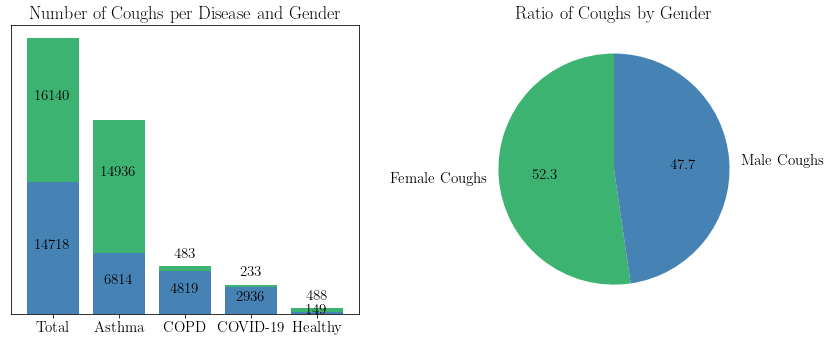

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Plot 3
axs[0].bar(labels, bar_data21_m["counts"], color=["steelblue"])
t = 0
for m in axs[0].containers:
    data_label = [v if v > t else "" for v in m.datavalues]    
axs[0].bar_label(m, labels=data_label,label_type='center', padding=4)
axs[0].bar(labels, bar_data21_f["counts"], bottom=bar_data21_m["counts"], color=["mediumseagreen"])
axs[0].set(title="Number of Coughs per Disease and Gender")
t = 0
for m in axs[0].containers:
    data_labelf = [v if v > t else "" for v in m.datavalues]  

axs[0].bar_label(m, labels=data_labelf, label_type='center', padding=15)
axs[0].set(yticks=[])

# Plot 4
gender_data = main_data["cough_gender"].value_counts()
gender_labels = ['Female Coughs', 'Male Coughs']
axs[1].pie(gender_data, labels = gender_labels, autopct=lambda p :'{:.1f}%  ({:,.0f})'.format(p,p * sum(gender_data)/100), startangle = 90, colors=["mediumseagreen", "steelblue"])

axs[1].set(title='Ratio of Coughs by Gender')

fig.tight_layout()
# plt.savefig("Plots\\eda2b.pdf", dpi=200)
# plt.savefig("Plots\\eda2b.png", dpi=200)

# Outlier Removal Subsection

In [12]:
############################# REMOVING OUTLIERS #############################

main_data = pd.read_csv("data\raw\main_data.csv")

def find_outliers(main_data, disease_name):
    
    data = main_data[main_data["disease"]==disease_name]

    Q1 = np.percentile(data['cough_duration'], 25,interpolation = 'midpoint')
    Q2 = np.percentile(data['cough_duration'], 50,interpolation = 'midpoint')        
    Q3 = np.percentile(data['cough_duration'], 75,interpolation = 'midpoint')
    IQR = Q3-Q1

    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR

    # Above Upper bound
    upper = np.where(data['cough_duration'].values >= (Q3+1.5*IQR))

    # Below Lower bound
    lower = np.where(data['cough_duration'].values <= (Q1-1.5*IQR))
    
    return(upper[0], lower[0])
    
asthma_upper_outliers, asthma_lower_outliers = find_outliers(main_data, "asthma")
copd_upper_outliers, copd_lower_outliers = find_outliers(main_data, "copd")
covid_upper_outliers, covid_lower_outliers = find_outliers(main_data, "covid-19")


outliers = np.concatenate((asthma_upper_outliers,asthma_lower_outliers,copd_upper_outliers,copd_lower_outliers,covid_upper_outliers,covid_lower_outliers))
main_data.drop(outliers, inplace=True)


# Saving main data without outliers
main_data.to_csv("data\\processed\\main_data_wo_outliers.csv", index=False)
main_data.to_excel("data\\processed\\main_data_wo_outliers.xlsx", index=False)



## Number of cough samples per patient distributions per disease

(0.0, 1500.0)

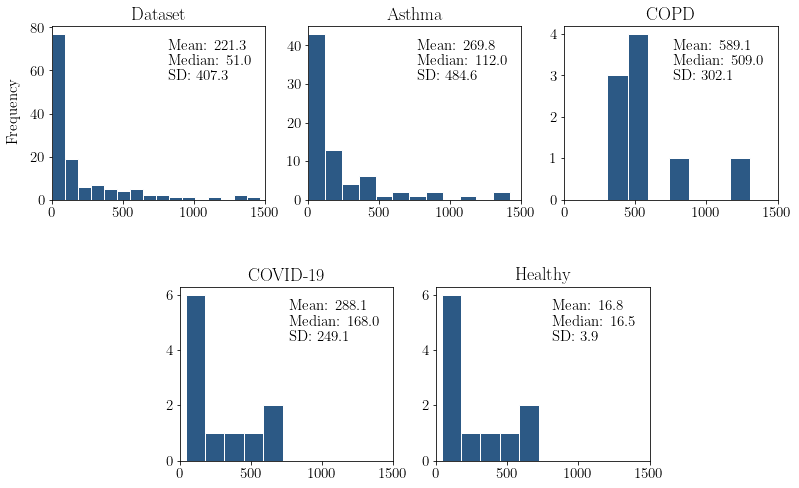

In [13]:
main_data= pd.read_csv("data\\processed\\main_data_wo_outliers.csv")

gs = gridspec.GridSpec(2, 6)
gs.update(wspace=0.5)
gs.update(hspace=0.5)

fig, axs = plt.subplots(1, 5, figsize=(13,8))

ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:])
ax4 = plt.subplot(gs[1, 1:3])
ax5 = plt.subplot(gs[1, 3:5])
axs[0] = ax1
axs[1] = ax2
axs[2] = ax3
axs[3] = ax4
axs[4] = ax5

cough_number= main_data.groupby("patient_ID")["cough_gender"].value_counts().rename_axis(['patient','gender']).reset_index(name='counts')

n_bins = 30
axs[0].hist(cough_number["counts"], color = "#2C5985", bins = "auto", edgecolor='white')

axs[0].set(title="Dataset")
legend = ['Mean: %.1f\nMedian: %.1f\nSD: %.1f' % (cough_number["counts"].mean(), cough_number["counts"].median(), cough_number["counts"].std())]
axs[0].legend(legend, frameon=False, loc='upper right', handletextpad=-2.0, handlelength=0)
axs[0].set_xlim([0, 1500])
axs[0].set_ylabel("Frequency", labelpad=10.0)


cough_number = main_data.groupby("patient_ID")["disease"].value_counts().rename_axis(['patient','disease']).reset_index(name='counts')
cough_number_asthma = cough_number[cough_number["disease"]=="asthma"]

n_bins = 30
axs[1].hist(cough_number_asthma["counts"], color = "#2C5985", bins = "auto",  edgecolor='white')
legend = ['Mean: %.1f\nMedian: %.1f\nSD: %.1f' % (cough_number_asthma["counts"].mean(), cough_number_asthma["counts"].median(), cough_number_asthma["counts"].std())]
axs[1].legend(legend, frameon=False, loc='upper right', handletextpad=-2.0, handlelength=0)
axs[1].set(title="Asthma")
axs[1].set_xlim([0, 1500])

n_bins = 10
cough_number_copd = cough_number[cough_number["disease"]=="copd"]

axs[2].hist(cough_number_copd["counts"], color = "#2C5985", bins = "auto",  edgecolor='white')
legend = ['Mean: %.1f\nMedian: %.1f\nSD: %.1f' % (cough_number_copd["counts"].mean(), cough_number_copd["counts"].median(), cough_number_copd["counts"].std())]
axs[2].legend(legend, frameon=False, loc='upper right', handletextpad=-2.0, handlelength=0)
axs[2].set(title="COPD")
axs[2].set_xlim([0, 1500])

n_bins = 5
cough_number_covid = cough_number[cough_number["disease"]=="covid-19"]
axs[3].hist(cough_number_covid["counts"], color = "#2C5985", bins = "auto",  edgecolor='white')
legend = ['Mean: %.1f\nMedian: %.1f\nSD: %.1f' % (cough_number_covid["counts"].mean(), cough_number_covid["counts"].median(), cough_number_covid["counts"].std())]
axs[3].legend(legend, frameon=False, loc='upper right', handletextpad=-2.0, handlelength=0)
axs[3].set(title="COVID-19")
axs[3].set_xlim([0, 1500])


n_bins = 5
cough_number_healthy = cough_number[cough_number["disease"]=="healthy"]

axs[4].hist(cough_number_covid["counts"], color = "#2C5985", bins = "auto",  edgecolor='white')
legend = ['Mean: %.1f\nMedian: %.1f\nSD: %.1f' % (cough_number_healthy["counts"].mean(), cough_number_healthy["counts"].median(), cough_number_healthy["counts"].std())]
axs[4].legend(legend, frameon=False, loc='upper right', handletextpad=-2.0, handlelength=0)
axs[4].set(title="Healthy")
axs[4].set_xlim([0, 1500])


# plt.savefig("Plots\\cough_amount_distribution.pdf", dpi=200)
# plt.savefig("Plots\\cough_amount_distribution.png", dpi=200)


## Cough duration distributions

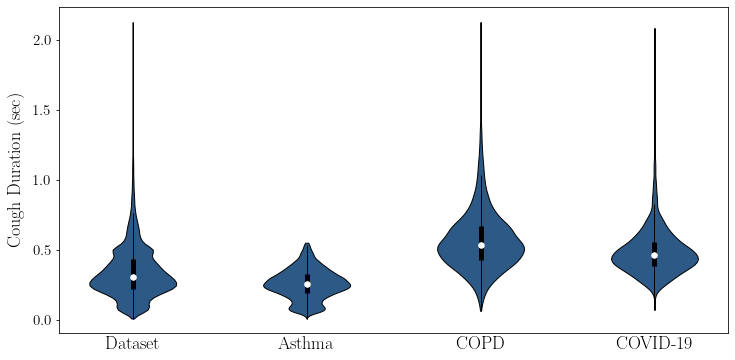

In [14]:
#SOURCE: Modifications based on https://matplotlib.org/stable/gallery/statistics/customized_violin.html

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
    

data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
main_duration = main_data["cough_duration"]

main_duration = main_duration.sort_values(inplace=False)
main_duration = main_duration.reset_index(drop=True, inplace=False)


cough_duration_asthma = main_data["cough_duration"][main_data["disease"]=="asthma"]
cough_duration_asthma = cough_duration_asthma.sort_values(inplace=False)
cough_duration_asthma = cough_duration_asthma.reset_index(drop=True)

cough_duration_copd = main_data["cough_duration"][main_data["disease"]=="copd"]
cough_duration_copd = cough_duration_copd.sort_values(inplace=False)
cough_duration_copd = cough_duration_copd.reset_index(drop=True)

cough_duration_covid = main_data["cough_duration"][main_data["disease"]=="covid-19"]
cough_duration_covid = cough_duration_covid.sort_values(inplace=False)
cough_duration_covid = cough_duration_covid.reset_index(drop=True)


data = []
data.append(main_duration.values)
data.append(cough_duration_asthma.values)
data.append(cough_duration_copd.values)
data.append(cough_duration_covid.values)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), sharey=True)


ax1.set_ylabel('Cough Duration (sec)', fontsize=18, labelpad=8.0)


parts = ax1.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
labels = ['Dataset', 'Asthma', 'COPD', 'COVID-19']

for pc in parts['bodies']:
    pc.set_facecolor('#2C5985')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for ind, i in enumerate(data):
    
    quartile1, medians, quartile3 = np.percentile(i, [25, 50, 75])
    whiskers = np.array([adjacent_values(i, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    ind= ind + 1
    ax1.scatter(ind, medians, marker='o', color='white', s=30, zorder=3)
    ax1.vlines(ind, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax1.vlines(ind, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    x=[1,2,3,4]
    ax1.tick_params(axis='x', which='both', length=0)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels,fontsize=18)

plt.show()
# plt.savefig("plots\\cough_duration_distribution.pdf", dpi=200)
# plt.savefig("plots\\cough_duration_distribution.png", dpi=200)


## Age distributions

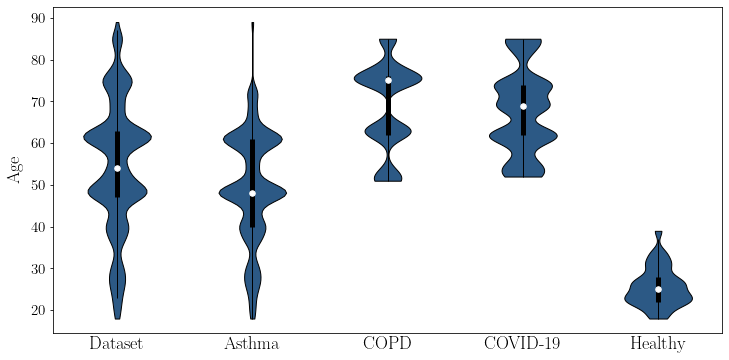

In [15]:

#SOURCE: https://matplotlib.org/stable/gallery/statistics/customized_violin.html

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

main_age= main_data["age"]

main_age = main_age.sort_values(inplace=False)
main_age = main_age.reset_index(drop=True, inplace=False)


age_asthma = main_data["age"][main_data["disease"]=="asthma"]
age_asthma = age_asthma.sort_values(inplace=False)
age_asthma = age_asthma.reset_index(drop=True)

age_copd = main_data["age"][main_data["disease"]=="copd"]
age_copd = age_copd.sort_values(inplace=False)
age_copd = age_copd.reset_index(drop=True)

age_covid = main_data["age"][main_data["disease"]=="covid-19"]
age_covid = age_covid.sort_values(inplace=False)
age_covid = age_covid.reset_index(drop=True)

age_healthy = main_data["age"][main_data["disease"]=="healthy"]
age_healthy = age_healthy.sort_values(inplace=False)
age_healthy = age_healthy.reset_index(drop=True)

data = []
data.append(main_age.values)
data.append(age_asthma.values)
data.append(age_copd.values)
data.append(age_covid.values)
data.append(age_healthy.values)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), sharey=True)
ax1.set_ylabel('Age', fontsize=18, labelpad=8.0)
parts = ax1.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
labels = ['Dataset', 'Asthma', 'COPD', 'COVID-19', 'Healthy']

for pc in parts['bodies']:
    pc.set_facecolor('#2C5985')  #TODO: red
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for ind, i in enumerate(data):
    
    quartile1, medians, quartile3 = np.percentile(i, [25, 50, 75])
    whiskers = np.array([adjacent_values(i, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    ind= ind + 1
    ax1.scatter(ind, medians, marker='o', color='white', s=30, zorder=3)
    ax1.vlines(ind, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax1.vlines(ind, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    x=[1,2,3,4,5]
    ax1.tick_params(axis='x', which='both', length=0)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels,fontsize=18)

plt.show() 
# plt.savefig("plots\\age_distribution.pdf", dpi=200)
# plt.savefig("plots\\age_distribution.png", dpi=200)